## Ejercicio 1: Construcción de una CNN para Clasificación de Imágenes Personalizadas

Instrucciones:

1. Descargar un dataset personalizado, por ejemplo, imágenes de flores de diferentes categorías.
1. Preprocesar las imágenes: redimensionar, normalizar y dividir en conjuntos de entrenamiento y prueba.
1. Construir y entrenar una CNN utilizando Keras para clasificar las imágenes en sus respectivas categorías.
1. Evaluar el modelo y reportar la precisión.

### Descarga de datos desde TensorFlow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Descargar el dataset 'tf_flowers'
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Ver categorías
print("Número de clases:", ds_info.features['label'].num_classes)


2025-04-01 12:37:59.874003: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/isaromobru/tensorflow_datasets/tf_flowers/incomplete.AQY76F_3.0.1/tf_flowers-train.tfrecord*.…

Dataset tf_flowers downloaded and prepared to /Users/isaromobru/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Número de clases: 5


### Preprocesamiento imágenes

In [2]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)


### Construcción de la CNN

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [4]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 978ms/step - accuracy: 0.4004 - loss: 1.3997 - val_accuracy: 0.5790 - val_loss: 1.0356
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 803ms/step - accuracy: 0.5840 - loss: 1.0240 - val_accuracy: 0.6635 - val_loss: 0.8833
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6594 - loss: 0.8523 - val_accuracy: 0.6226 - val_loss: 0.9651
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 840ms/step - accuracy: 0.7323 - loss: 0.7099 - val_accuracy: 0.6798 - val_loss: 0.8425
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7844 - loss: 0.5652 - val_accuracy: 0.6785 - val_loss: 0.8470
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8631 - loss: 0.3951 - val_accuracy: 0.6853 - val_loss: 0.9543
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9103 - loss: 0.2529 - val_accuracy: 0.6826 - val_loss: 1.0909
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9617 - loss: 0.1208 - val_accuracy: 0.6730

### Evaluar modelo

In [5]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Precisión en datos de prueba: {test_accuracy:.2%}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.6938 - loss: 1.5167
Precisión en datos de prueba: 69.21%


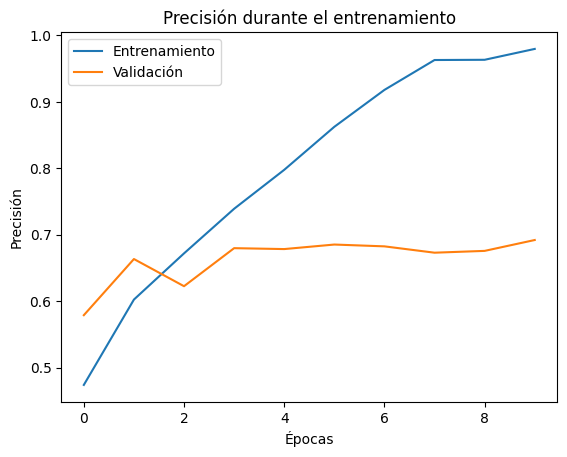

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


## Ejercicio 2: Implementación de Transfer Learning con ResNet50

Instrucciones:

1. Utilizar un modelo preentrenado como ResNet50.
1. Congelar las capas del modelo base y añadir nuevas capas superiores para la clasificación personalizada.
1. Entrenar el modelo y evaluar su desempeño.

### Carga y preparación

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

IMG_SIZE = 224  # Requerido por ResNet50
BATCH_SIZE = 32

# Cargar y dividir el dataset
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

NUM_CLASSES = ds_info.features['label'].num_classes

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)


### ResNet50 y añadir capas superiores

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar ResNet50 sin la parte superior (top)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Congelar capas base

# Crear modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Entrenamiento

In [9]:
history = model.fit(ds_train, epochs=5, validation_data=ds_test)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 575s 6s/step - accuracy: 0.2806 - loss: 1.5922 - val_accuracy: 0.3025 - val_loss: 1.5650
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.3679 - loss: 1.4992 - val_accuracy: 0.4101 - val_loss: 1.4416
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 422s 5s/step - accuracy: 0.4071 - loss: 1.4404 - val_accuracy: 0.3856 - val_loss: 1.4779
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 414s 4s/step - accuracy: 0.4144 - loss: 1.4213 - val_accuracy: 0.4332 - val_loss: 1.4095
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.4283 - loss: 1.4091 - val_accuracy: 0.4114 - val_loss: 1.3916


### Evaluar modelo

In [10]:
loss, accuracy = model.evaluate(ds_test)
print(f'Precisión en el conjunto de prueba: {accuracy:.2%}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.4167 - loss: 1.3745
Precisión en el conjunto de prueba: 41.14%


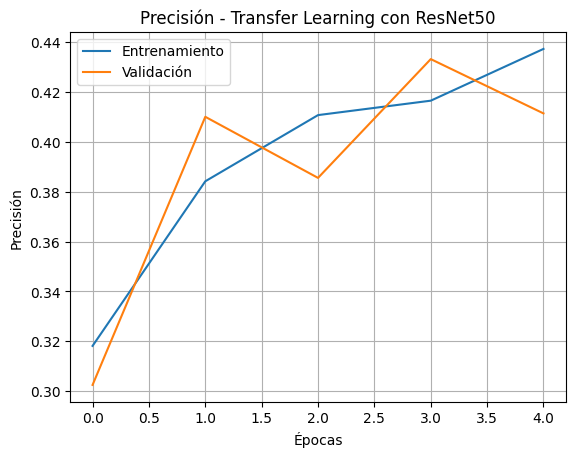

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión - Transfer Learning con ResNet50')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 3: Detección de Objetos con SSD (Single Shot MultiBox Detector)

Instrucciones:

1. Utilizar una implementación preexistente de SSD con Keras.
1. Entrenar el modelo en un dataset de detección de objetos.
1. Evaluar y visualizar las predicciones.

In [8]:
from keras_cv.models import RetinaNet

model = RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",  # o usa 'resnet50_coco'
    bounding_box_format="xywh"
)


In [9]:
import tensorflow_datasets as tfds

dataset, info = tfds.load(
    "coco/2017",
    split="train[:10%]",  # Usa un subconjunto si estás probando
    with_info=True,
    shuffle_files=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: 

In [10]:
def format_example(example):
    image = example["image"]
    boxes = example["objects"]["bbox"]
    class_ids = example["objects"]["label"]
    return {
        "images": image,
        "bounding_boxes": {
            "boxes": boxes,
            "classes": class_ids
        }
    }

formatted_dataset = dataset.map(format_example).batch(8)


NameError: name 'dataset' is not defined

In [5]:
model.compile(
    optimizer="adam",
    classification_loss="focal",     # Focal Loss para desequilibrio de clases
    box_loss="smoothl1",             # Smooth L1 para regresión de cajas
)


In [ ]:
model.fit(dataset, epochs=10)


In [ ]:
import matplotlib.pyplot as plt
import keras_cv.visualization

for batch in formatted_dataset.take(1):
    images = batch["images"]
    preds = model.predict(images)
    
    keras_cv.visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format="xywh",
        y_pred=preds,
        rows=2,
        cols=4,
        show=True,
    )


In [ ]:
IMG_SIZE = 300

def format_sample(image, labels):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, labels['objects']['label'][0]  # Usamos solo una etiqueta para simplificar

ds_train = ds_train.map(format_sample).batch(32).prefetch(1)
ds_val = ds_val.map(format_sample).batch(32).prefetch(1)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Transfer Learning

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [ ]:
history = model.fit(ds_train, validation_data=ds_val, epochs=10)


In [ ]:
loss, acc = model.evaluate(ds_val)
print(f'Precisión en validación: {acc:.2%}')


In [ ]:
import matplotlib.pyplot as plt

for image, label in ds_val.take(1):
    pred = model.predict(tf.expand_dims(image[0], axis=0))
    predicted_label = tf.argmax(pred[0]).numpy()
    
    plt.imshow(image[0])
    plt.title(f'Predicción: {ds_info.features["objects"]["label"].int2str(predicted_label)}')
    plt.axis('off')
    plt.show()
